# Model Testbed

In [1]:
using AutomotiveDrivingModels
using AutoViz
using LsqFit
using Reactive, Interact
using UrbanDrivingSimulation

## Build Intersection

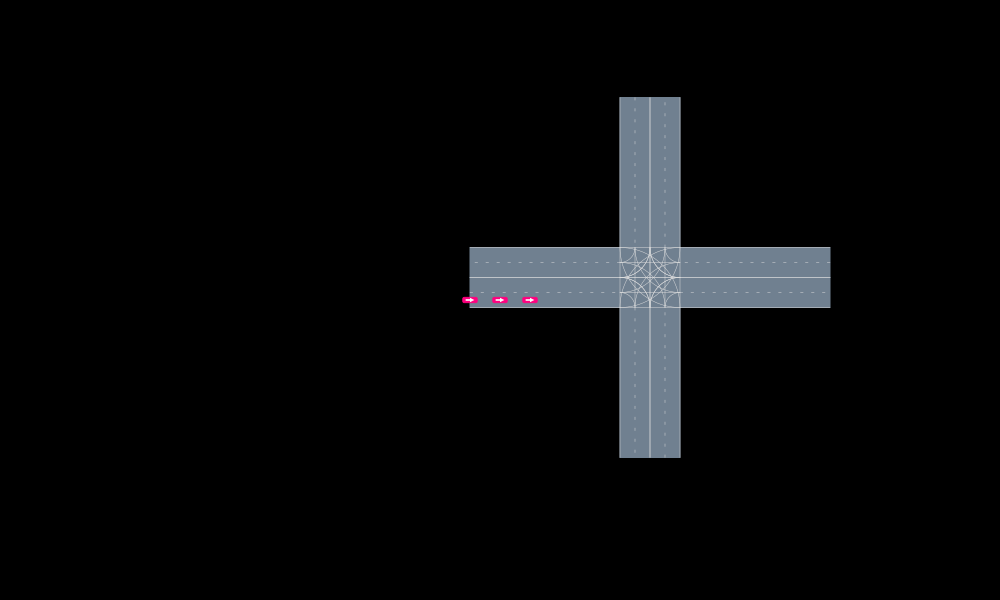

In [2]:
roadlength = 50.0
lane_width = 5.0
roadway,junction = gen_intersection(roadlength = roadlength,lane_width = lane_width)
scene = Frame(Entity{VehicleState, BicycleModel, Int},100)
#scene = Scene()
id=1
push!(scene,Entity(VehicleState(VecSE2(0.0,0.0,0.0), roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(VecSE2(10.0,0.0,0.0), roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(VecSE2(20.0,0.0,0.0), roadway, 9.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
render(scene, roadway)

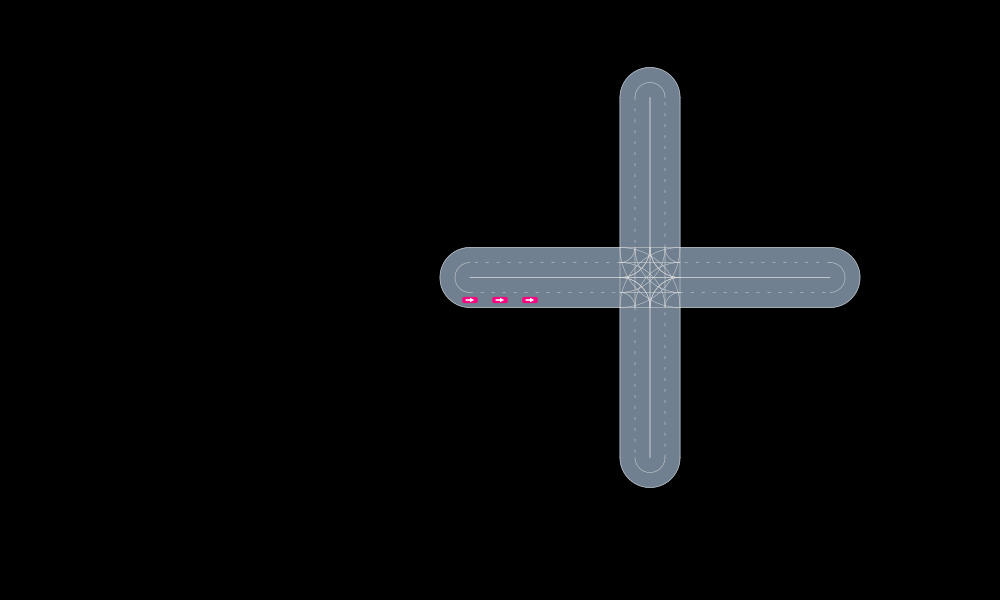

In [3]:
connect_two_seg!(roadway.segments[2],roadway.segments[3],roadway)
connect_two_seg!(roadway.segments[4],roadway.segments[5],roadway)
connect_two_seg!(roadway.segments[6],roadway.segments[7],roadway)
connect_two_seg!(roadway.segments[8],roadway.segments[1],roadway)
render(scene, roadway)

## Model Test

In [4]:
framerate = 24
timeStep = 0.05
models = Dict{Int, DriverModel}()

models[1]=EnvDriver(timeStep,direction=1) #IDM and MOBIL, direction specifies which lane to go at intersection
models[2]=EnvDriver(timeStep,direction=2)
models[3]=MultiPtsTurningDriver(timeStep,v_max=20.0,v_min=0.0,turning_direction=3) #Use 20 waypoints to guide the veh
excuteAction!(models[3],0.0,0,scene, roadway, 1)
#0.0 is the desired acc, 0 means keeping current lane, 1 means changing to left lane, -1 means changing to right lane
actions = get_actions!(Array(Any, length(scene)), scene, roadway, models)

3-element Array{Any,1}:
 LatLonAccelDirection(-0.000, -9.000, 1)
 LatLonAccelDirection(-0.000, -9.000, 2)
 AccelSteeringDirection( 0.000, 0.000,1)

In [5]:
function drawsim(t)
    get_actions!(actions, scene, roadway, models)
    #actions[1] = AccelSteeringAngle(0.5,0.0)
    #actions[2] = LatLonAccel(0.0,0.5)
    #actions[3] = LatLonAccel(0.0,0.5)
    tick!(scene, roadway, actions, timeStep)
    text1=[string("ego speed: ", scene[3].state.v)]
    render(scene, roadway,models,text=text1,cam=StaticCamera(VecE2(roadlength+lane_width,0.5*lane_width), 4.0))
    # render(scene, roadway,models,cam=CarFollowCamera{Int}(1, 8.0))
end

#Uncomment the following lines to let the simulation run continuously
#ticks = fps(framerate)
#timestamps = map(_ -> time(), ticks)
#map(drawsim, timestamps)

drawsim (generic function with 1 method)

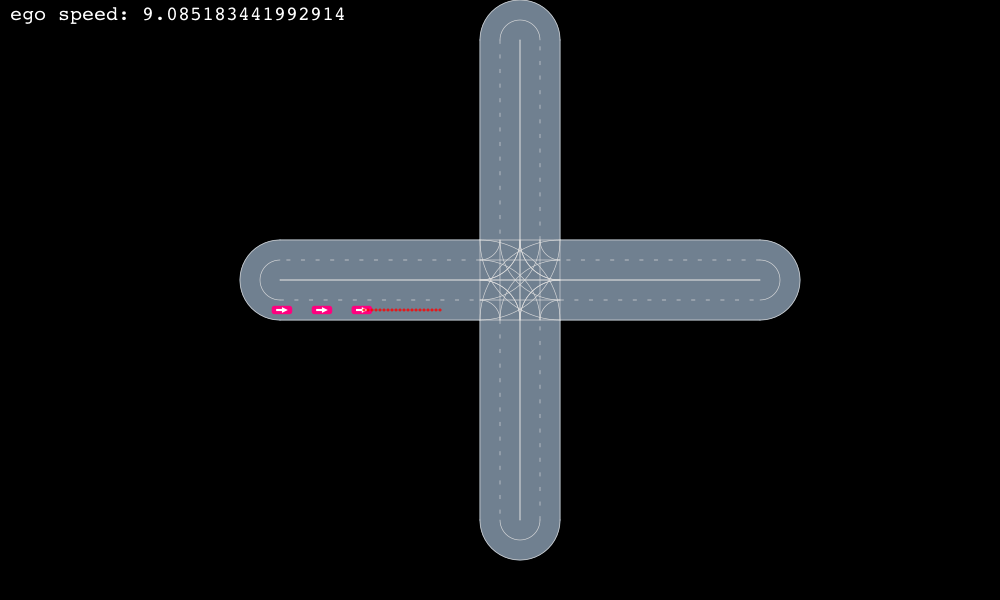

In [6]:
drawsim(0)